In [1]:
import missingno
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB

# 딥러닝.
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# 저장된 딥러닝 모델을 복구하는 함수.
from keras.models import load_model

# epoch마다 모델을 저장하는 함수.
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수.
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

#### 데이터 준비

In [2]:
# 데이터 읽기.
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
# display(train)
# display(test)

In [3]:
# Train data 정보 확인.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Test data 정보 확인.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 데이터 전처리

In [5]:
# Train data 결측치 확인.
# Age, Cabin, Embarked에서 결측치 확인.
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Test data 결측치 확인.
# Age, Cabin, Fare에서 결측치 확인.
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# 두 데이터 프레임을 결합.
data = pd.concat((train, test))
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- PassengerId 
    - 승객 일련 번호를 나타냄.
    - 1부터 1씩 증가시킨 값이므로 인덱스와 다를 바가 없음. 따라서 사용 안함.

#### 결측치 확인

In [8]:
# 결합한 데이터 결측치 확인.
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

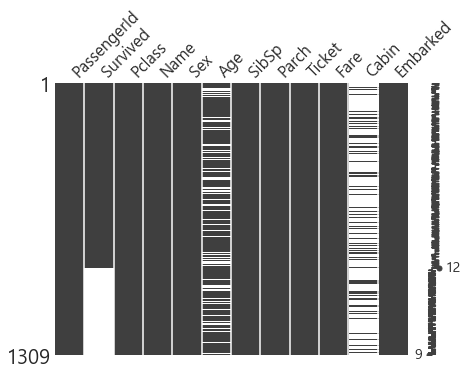

In [9]:
# 시각적인 방법으로 결측치 확인.
# Misssingno를 활용한 결측치 확인.
missingno.matrix(data, figsize=(7, 5))
plt.show()

#### Pclass : 승객 등급
- 1등석은 생존확률이 높고 3등석은 사망확률이 상대적으로 높음.

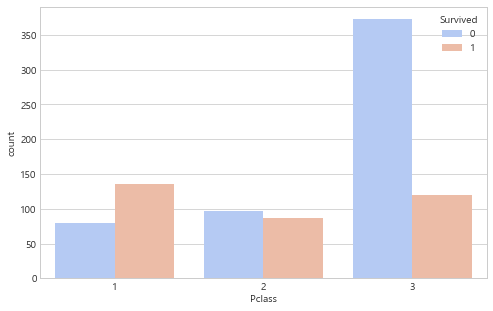

In [10]:
# Pclass 변수 결측 존재하지 않음.
plt.figure(figsize=(8,5))
palette1 = sb.color_palette('coolwarm', 2)
sb.countplot('Pclass', hue='Survived', data=train, palette=palette1)
plt.show()

#### Name : 이름

In [11]:
# LastName 추가 및 추출.
data['LastName'] = 0
data['LastName'] = data.Name.str.extract('([A-Za-z]+)')
data['LastName']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
413      Spector
414        Oliva
415      Saether
416         Ware
417        Peter
Name: LastName, Length: 1309, dtype: object

In [12]:
# LastName이 얼마나 있는지 확인.
data['LastName'].value_counts()

O            12
Sage         11
Andersson    11
Asplund       8
Goodwin       8
             ..
Frost         1
Case          1
Smiljanic     1
Adahl         1
Niklasson     1
Name: LastName, Length: 853, dtype: int64

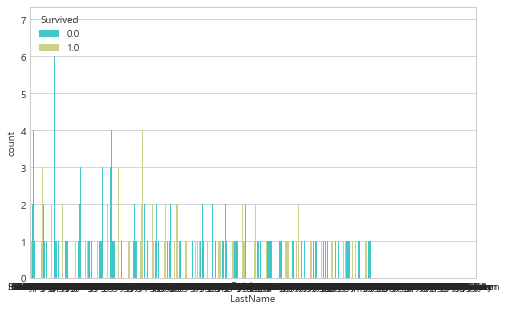

In [13]:
plt.figure(figsize=(8,5))
sb.countplot(data=data, x='LastName', hue='Survived', palette='rainbow')
# plt.xticks(rotation=90)
plt.show()

#### Sex : 성별
- male : 남성
- female : 여성
- 남성은 사망확률이 높고 여성은 생존확률이 높음.

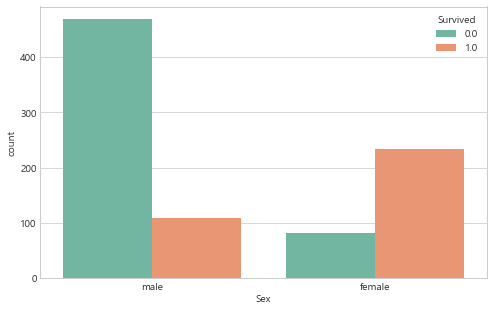

In [14]:
plt.figure(figsize=(8,5))
sb.countplot(data=data, x='Sex', hue='Survived', palette='Set2')
plt.show()

#### Age : 나이
- 영유아 및 노년의 경우 생존 확률이 높음.

In [15]:
# 결측치 존재.
data['Age'].isna().sum()

263

In [16]:
# 이름에서 이니셜을 추출.
data['Initial'] = 0
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Capt          1
Jonkheer      1
Countess      1
Don           1
Mme           1
Lady          1
Sir           1
Dona          1
Name: Initial, dtype: int64

In [17]:
# 이니셜 나이의 평균.
data.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [18]:
# 인덱스를 다시 설정.
data = data.reset_index(drop=True)

# 이니셜별 나이 평균을 구해 결측치로 채움.
data['Age'] = data.groupby('Initial')['Age'].apply(lambda x : x.fillna(x.mean()))

# 결측치 확인.
data['Age'].isna().sum()

0

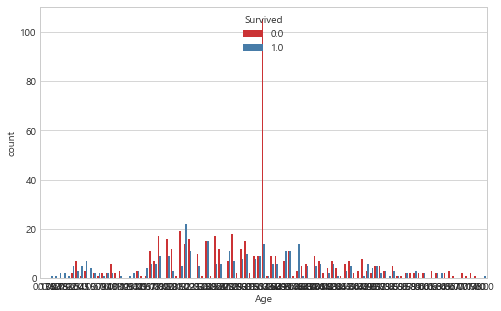

In [19]:
# 나이에 따른 생존자 수.
plt.figure(figsize=(8,5))
sb.countplot(data=data, x='Age', hue='Survived', palette='Set1')
plt.show()

#### SibSp : 동승한 형제, 자매 수¶
- 동승한 형제 자매가 없으면 사망률이 상대적으로 상승.

In [20]:
# 결측치 존재하지 않음.
data['SibSp'].isna().sum()

0

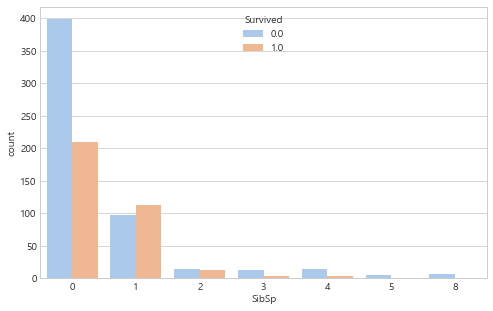

In [21]:
plt.figure(figsize=(8,5))
sb.countplot(data=data, x='SibSp', hue='Survived', palette='pastel')
plt.show()

#### Parch : 동승한 부모 자식 수
- 동승한 부모 자식이 없을 경우 사망확률이 상승.

In [22]:
# 결측치 존재하지 않음.
data['Parch'].isna().sum()

0

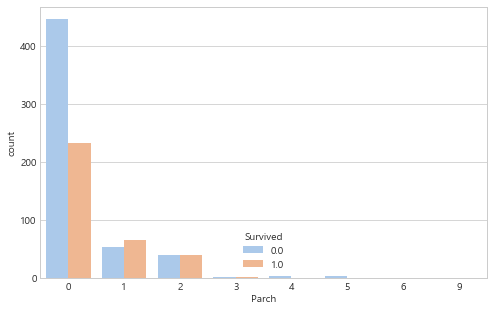

In [23]:
plt.figure(figsize=(8,5))
sb.countplot(data=data, x='Parch', hue='Survived',  palette='pastel')
plt.show()

#### Ticket : 티켓 번호
- 일부 티켓의 경우 동일한 티켓을 가진 사람들이 존재하여 티켓에 따라 사망 생존률이 다름.

In [24]:
# 결측치 존재하지 않음.
data['Ticket'].isna().sum()

0

In [25]:
data['Ticket'].value_counts()

CA. 2343    11
CA 2144      8
1601         8
3101295      7
347082       7
            ..
223596       1
2673         1
2685         1
2696         1
113792       1
Name: Ticket, Length: 929, dtype: int64

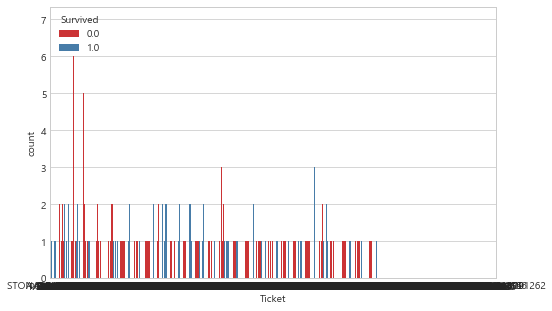

In [26]:
plt.figure(figsize=(8,5))
sb.countplot(data=data, x='Ticket', hue='Survived', palette='Set1')
plt.show()

#### Fare : 요금
- 요금이 낮을 수록 사망할 확률이 높음.

In [27]:
# 결측치 1개 존재.
data['Fare'].isna().sum()

1

In [28]:
# 요금의 전체 평균을 Fare의 결측치로 대체.
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
data['Fare'].isna().sum()

0

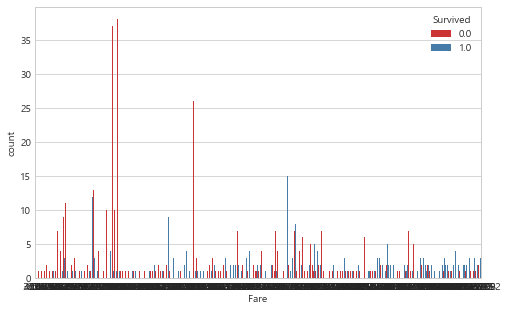

In [29]:
plt.figure(figsize=(8,5))
sb.countplot(data=data, x='Fare', hue='Survived', palette='Set1')
plt.show()

#### Cabin : 객실
- 3등석 객실에 해당하는 사람들의 사망확률이 높음.

In [30]:
# 결측치 존재.
data['Cabin'].isna().sum()

1014

In [31]:
data['Cabin2'] = data['Cabin'].str.extract('^([A-Za-z]+)')
data['Cabin2']

0       NaN
1         C
2       NaN
3         C
4       NaN
       ... 
1304    NaN
1305      C
1306    NaN
1307    NaN
1308    NaN
Name: Cabin2, Length: 1309, dtype: object

In [32]:
# 1등석인 사람들의 객실 정보를 확인.
a1 = data.query('Pclass == 1')
a2 = a1.loc[a1['Cabin'].notnull()]
a2['Cabin2'].value_counts()

C    94
B    65
D    40
E    34
A    22
T     1
Name: Cabin2, dtype: int64

In [33]:
# 2등석인 사람들의 객실 정보를 확인.
a1 = data.query('Pclass == 2')
a2 = a1.loc[a1['Cabin'].notnull()]
a2['Cabin2'].value_counts()

F    13
D     6
E     4
Name: Cabin2, dtype: int64

In [34]:
# 3등석인 사람들의 객실 정보를 확인.
a1 = data.query('Pclass == 3')
a2 = a1.loc[a1['Cabin'].notnull()]
a2['Cabin2'].value_counts()

F    8
G    5
E    3
Name: Cabin2, dtype: int64

In [35]:
# 각 등급마다 겹치는 객실이 있으므로 1등석은 X, 2등석은 Y, 3등석은 Z로 각각 설정.
a1 = data.query('Pclass == 1')
a2 = a1.loc[a1['Cabin'].isnull()]
data.loc[a2.index, 'Cabin2'] = 'X'
data['Cabin2'].value_counts()

C    94
X    67
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin2, dtype: int64

In [36]:
a1 = data.query('Pclass == 2')
a2 = a1.loc[a1['Cabin'].isnull()]
data.loc[a2.index, 'Cabin2'] = 'Y'
data['Cabin2'].value_counts()

Y    254
C     94
X     67
B     65
D     46
E     41
A     22
F     21
G      5
T      1
Name: Cabin2, dtype: int64

In [37]:
a1 = data.query('Pclass == 3')
a2 = a1.loc[a1['Cabin'].isnull()]
data.loc[a2.index, 'Cabin2'] = 'Z'
data['Cabin2'].value_counts()

Z    693
Y    254
C     94
X     67
B     65
D     46
E     41
A     22
F     21
G      5
T      1
Name: Cabin2, dtype: int64

In [38]:
# 결측 재확인.
data['Cabin2'].isna().sum()

0

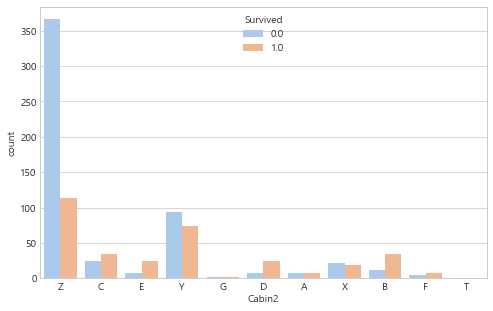

In [39]:
plt.figure(figsize=(8,5))
sb.countplot(data=data, x='Cabin2', hue='Survived', palette='pastel')
plt.show()

#### Embarked : 선착장
- S에서 탑승한 승객의 사망확률이 높음.

In [40]:
# 결측치 존재.
data['Embarked'].isna().sum()

2

In [41]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [42]:
a1 = data.loc[data['Embarked'].isnull()]
data.loc[a1.index, 'Embarked'] = 'S'
data['Embarked'].isna().sum()

0

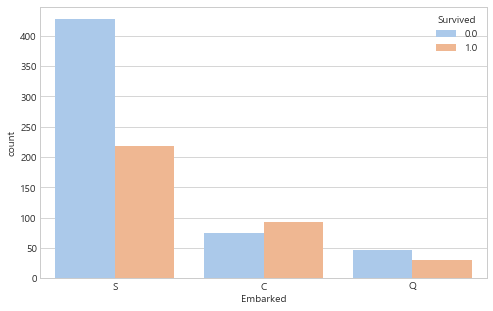

In [43]:
plt.figure(figsize=(8,5))
sb.countplot(data=data, x='Embarked', hue='Survived', palette='pastel')
plt.show()

#### 데이터 시각화 분석

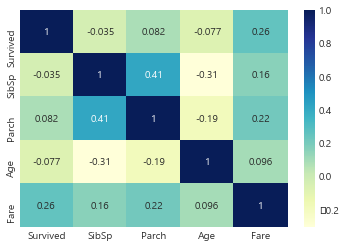

In [44]:
# Hitmap.
# 수치 데이터 간의 상관관계를 확인.
# 대체로 큰 상관관계를 보이고 있지 않음.
a = train[['Survived','SibSp','Parch', 'Age', 'Fare']]
sb.heatmap(a.corr(), annot=True, cmap='YlGnBu')
plt.show()

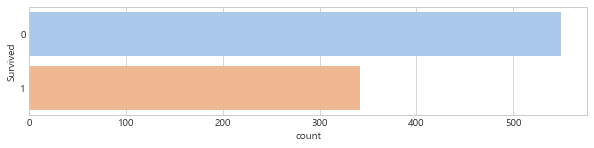

In [45]:
# 전체 생존자 확인.
plt.figure(figsize=(10, 2))

# countplot() : 지정된 컬럼 안에 저장되어 있는 값들의 개수를 표현.
sb.countplot(y='Survived', data=train, palette='pastel')
plt.show()

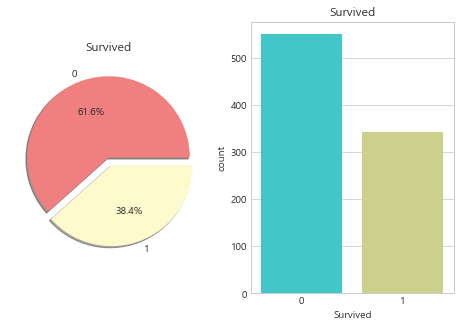

In [46]:
# 생존자 정보 다른 방식의 시각화를 통해 파악.
f, ax = plt.subplots(1,2, figsize=(8,5))
a1 = train.Survived.value_counts()
a1.plot.pie(ax=ax[0], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['lightcoral','lemonchiffon'] )
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sb.countplot('Survived', data=train, ax=ax[1], palette='rainbow')
ax[1].set_title('Survived')
plt.show()

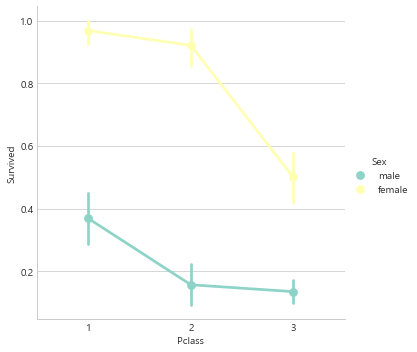

In [47]:
# Pcalss별 남녀 생존 확률(생존 비율)을 팩토플롯으로 확인.
sb.factorplot('Pclass', 'Survived', hue='Sex', data=train, palette='Set3')
plt.show()

In [48]:
# 크로스 탭을 Pclass별 생존자 숫자 보기.
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


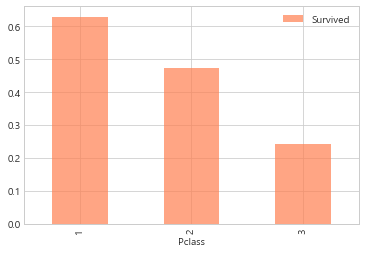

In [49]:
a = train[['Pclass', 'Survived']].groupby('Pclass').mean()
a.plot.bar(color='coral', alpha=0.7)
plt.show()

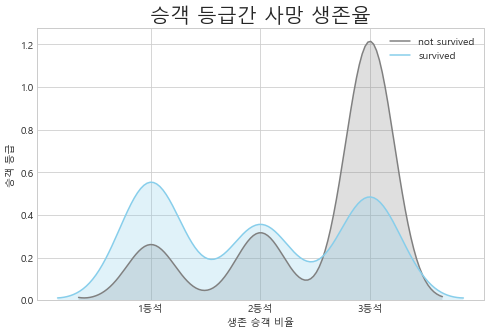

In [50]:
plt.figure(figsize=(8,5))
# 사망자(0)와 생존자(1)
sb.kdeplot(train.Pclass[train.Survived==0], color='gray', shade=True, label='not survived')
sb.kdeplot(train.Pclass[train.Survived==1], color='skyblue',shade=True, label='survived')
plt.title('승객 등급간 사망 생존율', fontsize=20)
plt.xlabel('생존 승객 비율'); plt.ylabel('승객 등급')
plt.xticks(sorted(train.Pclass.unique()), ['1등석','2등석','3등석'])
plt.legend()
plt.show()

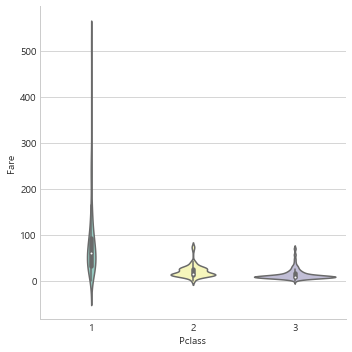

In [51]:
# Violin plot.
# 각 클래스 별 요금.
# catplot() : 색상(hue)과 행(row) 등을 동시에 사용하여 3개 이상의 카테고리 값에 의한 분포 변화를 보여줌.
sb.catplot(x='Pclass', y='Fare', kind='violin', data=train, palette='Set3')
plt.show()

#### 머신러닝을 위한 전처리

In [52]:
# 데이터 복사.
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Initial,Cabin2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,Z


In [53]:
# 결측치 확인.
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
LastName          0
Initial           0
Cabin2            0
dtype: int64

In [54]:
# 데이터 컬럼명.
# df.keys()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'LastName', 'Initial',
       'Cabin2'],
      dtype='object')

In [55]:
# 불필요한 컬럼 제거.
df.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Cabin'], axis=1, inplace=True)
df.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2
0,3,male,22.0,A/5 21171,7.2500,S,Braund,Mr,Z
1,1,female,38.0,PC 17599,71.2833,C,Cumings,Mrs,C
2,3,female,26.0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Z
3,1,female,35.0,113803,53.1000,S,Futrelle,Mrs,C
4,3,male,35.0,373450,8.0500,S,Allen,Mr,Z


In [56]:
# 가족 수를 계산하여 추가.
df['FamilySize'] = data['SibSp'] + data['Parch'] + 1
df.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize
0,3,male,22.0,A/5 21171,7.2500,S,Braund,Mr,Z,2
1,1,female,38.0,PC 17599,71.2833,C,Cumings,Mrs,C,2
2,3,female,26.0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Z,1
3,1,female,35.0,113803,53.1000,S,Futrelle,Mrs,C,2
4,3,male,35.0,373450,8.0500,S,Allen,Mr,Z,1


In [57]:
# 문자열의 숫자 변환.
df['Sex']      = df['Sex'].factorize()[0]
df['Ticket']   = df['Ticket'].factorize()[0]
df['Embarked'] = df['Embarked'].factorize()[0]
df['LastName'] = df['LastName'].factorize()[0]
df['Initial']  = df['Initial'].factorize()[0]
df['Cabin2']   = df['Cabin2'].factorize()[0]
df.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize
0,3,0,22.0,0,7.2500,0,0,0,0,2
1,1,1,38.0,1,71.2833,1,1,1,1,2
2,3,1,26.0,2,7.9250,0,2,2,0,1
3,1,1,35.0,3,53.1000,0,3,1,1,2
4,3,0,35.0,4,8.0500,0,4,0,0,1


In [58]:
# 각 Row의 데이터를 변형한 데이터를 담는 작업.
temp = df.copy()
temp['Survived']   = data['Survived']
temp['Pclass']     = temp.groupby('Pclass')['Survived'].transform('mean')
temp['Sex']        = temp.groupby('Sex')['Survived'].transform('mean')
temp['Age']        = temp.groupby('Age')['Survived'].transform('mean')
temp['Ticket']     = temp.groupby('Ticket')['Survived'].transform('mean')
temp['Fare']       = temp.groupby('Fare')['Survived'].transform('mean')
temp['Embarked']   = temp.groupby('Embarked')['Survived'].transform('mean')
temp['LastName']   = temp.groupby('LastName')['Survived'].transform('mean')
temp['Initial']    = temp.groupby('Initial')['Survived'].transform('mean')
temp['Cabin2']     = temp.groupby('Cabin2')['Survived'].transform('mean')
temp['FamilySize'] = temp.groupby('FamilySize')['Survived'].transform('mean')
temp.head(10)

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.000000,0.156673,0.235908,0.552795,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.000000,0.792000,0.593220,0.552795,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.000000,0.697802,0.235908,0.303538,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.500000,0.792000,0.593220,0.552795,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.500000,0.156673,0.235908,0.303538,0.0
5,0.242363,0.188908,0.117647,0.0,0.000000,0.389610,0.333333,0.156673,0.235908,0.303538,0.0
6,0.629630,0.188908,0.375000,0.0,0.500000,0.339009,0.000000,0.156673,0.750000,0.303538,0.0
7,0.242363,0.188908,0.300000,0.0,0.000000,0.339009,0.000000,0.575000,0.235908,0.200000,0.0
8,0.242363,0.742038,0.611111,1.0,1.000000,0.339009,0.500000,0.792000,0.235908,0.578431,1.0
9,0.472826,0.742038,0.500000,0.5,0.500000,0.553571,0.500000,0.792000,0.440476,0.552795,1.0


In [59]:
# 각 Row별 통계량을 구해서 담기.
# 평균
temp['Mean'] = 0 
# 최대
temp['Max'] = 0
# 최소
temp['Min'] = 0    
# 개인정보
temp['Social'] = 0
# 탑승정보
temp['Wealth'] = 0
# 최대 - 최소
temp['Diff'] = 0   

# 추가적 데이터 담기.
temp['Mean']   = temp.mean(axis=1)
temp['Max']    = temp.max(axis=1)
temp['Min']    = temp.min(axis=1)
temp['Social'] = (temp['Initial'] + temp['Sex'] + temp['Age'] + temp['FamilySize']) / 4
temp['Wealth'] = (temp['Pclass'] + temp['Ticket'] + temp['Fare'] + temp['Cabin2']) / 4
temp['Diff'] = temp['Max'] - temp['Min']
temp.head(10)

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived,Mean,Max,Min,Social,Wealth,Diff
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.000000,0.156673,0.235908,0.552795,0.0,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.000000,0.792000,0.593220,0.552795,1.0,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.000000,0.697802,0.235908,0.303538,1.0,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.500000,0.792000,0.593220,0.552795,1.0,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.500000,0.156673,0.235908,0.303538,0.0,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
5,0.242363,0.188908,0.117647,0.0,0.000000,0.389610,0.333333,0.156673,0.235908,0.303538,0.0,0.115764,0.389610,0.0,0.191692,0.119568,0.389610
6,0.629630,0.188908,0.375000,0.0,0.500000,0.339009,0.000000,0.156673,0.750000,0.303538,0.0,0.190750,0.750000,0.0,0.256030,0.469907,0.750000
7,0.242363,0.188908,0.300000,0.0,0.000000,0.339009,0.000000,0.575000,0.235908,0.200000,0.0,0.122423,0.575000,0.0,0.315977,0.119568,0.575000
8,0.242363,0.742038,0.611111,1.0,1.000000,0.339009,0.500000,0.792000,0.235908,0.578431,1.0,0.414168,1.000000,0.0,0.680895,0.619568,1.000000
9,0.472826,0.742038,0.500000,0.5,0.500000,0.553571,0.500000,0.792000,0.440476,0.552795,1.0,0.385512,1.000000,0.0,0.646708,0.478326,1.000000


In [60]:
# 원본에 담기.
df['Mean']   = temp['Mean']
df['Max']    = temp['Max']
df['Min']    = temp['Min']
df['Social'] = temp['Social']
df['Wealth'] = temp['Wealth']
df['Diff']   = temp['Diff']
df.head(10)

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Mean,Max,Min,Social,Wealth,Diff
0,3,0,22.000000,0,7.2500,0,0,0,0,2,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,1,1,38.000000,1,71.2833,1,1,1,1,2,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,3,1,26.000000,2,7.9250,0,2,2,0,1,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,1,1,35.000000,3,53.1000,0,3,1,1,2,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,3,0,35.000000,4,8.0500,0,4,0,0,1,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
5,3,0,32.252151,5,8.4583,2,5,0,0,1,0.115764,0.389610,0.0,0.191692,0.119568,0.389610
6,1,0,54.000000,6,51.8625,0,6,0,2,1,0.190750,0.750000,0.0,0.256030,0.469907,0.750000
7,3,0,2.000000,7,21.0750,0,7,3,0,5,0.122423,0.575000,0.0,0.315977,0.119568,0.575000
8,3,1,27.000000,8,11.1333,0,8,1,0,3,0.414168,1.000000,0.0,0.680895,0.619568,1.000000
9,2,1,14.000000,9,30.0708,1,9,1,3,2,0.385512,1.000000,0.0,0.646708,0.478326,1.000000


In [61]:
# 데이터 준비.
# Train 데이터의 개수.
n_train = train.shape[0]

# Test 테이터의 개수.
n_test = test.shape[0]

# 결과 데이터.
y_train = train['Survived'].values

# Test 테이터의 승객 번호를 가져옴.
passId = test['PassengerId']

# dataframe의 데이터 정리.
# 각 컬럼의 값을 작은 숫자부터 큰 숫자까지 0 부터 시작하는 값으로 변환.
df_enc = df.apply(LabelEncoder().fit_transform)
df_enc

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Mean,Max,Min,Social,Wealth,Diff
0,2,0,34,0,20,0,0,0,0,1,159,15,0,83,2,15
1,0,1,61,1,238,1,1,1,1,1,1098,34,0,266,142,34
2,2,1,41,2,50,0,2,2,0,0,838,34,0,164,78,34
3,0,1,56,3,218,0,3,1,1,1,910,34,0,285,96,34
4,2,0,56,4,52,0,4,0,0,0,325,19,0,74,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2,0,51,926,52,0,850,0,0,0,111,0,0,7,218,0
1305,0,1,63,273,262,1,851,17,1,0,703,26,0,322,90,26
1306,2,0,62,927,20,0,852,0,0,0,102,0,0,323,181,0
1307,2,0,51,928,52,0,799,0,0,0,111,0,0,7,392,0


In [62]:
# 학습용 데이터와 테스트 데이터로 분할.
X_train = df_enc[: n_train]
X_test  = df_enc[n_train :]
print(len(X_train))
print(len(X_test))

891
418


In [63]:
# 스캐일링 작업.
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test  = scaler.transform(X_test)

#### Machine  Learnig Modeling

In [64]:
# 하이퍼 파라미터 설정.
ran = RandomForestClassifier(n_estimators=25,
                            max_depth=3,
                            max_features=3,
                            min_samples_leaf=2,
                            min_impurity_split=8,
                            random_state=1)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=1,
                          n_neighbors=5, weights='uniform')

log = LogisticRegression(C=2.7825594022071245, penalty='l2')

xgb = XGBClassifier(learning_rate=0.0001, n_estimators=10, random_state=1)

gbc = GradientBoostingClassifier(learning_rate=0.0005, n_estimators=1250,
                                random_state=1)

svc = SVC(probability=True)

ext = ExtraTreesClassifier(max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=10, random_state=1)

ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=1)

gnb = GaussianNB()

gpc = GaussianProcessClassifier()

bag = BaggingClassifier(random_state=1)

In [65]:
# 사용할 알고리즘 객체들을 리스트에 담기.
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gbc, bag]

# 각 모델별 성능을 담을 리스트.
score_List = []

# 성능 테스트.
for mod in models : 
    # 학습.
    mod.fit(x_train, y_train)
    
    # 교차검증.
    Acc = cross_val_score(mod, x_train, y_train, scoring='accuracy', cv=10)
    
    # 교차검증에 대한 평균 성능 수치를 리스트에 담기.
    score_List.append(Acc.mean())

[18:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [66]:
# 성능 결과를 Dataframe으로 변환.
results = pd.DataFrame({
    'Model' : ['Random Forest', 'KNN', 'Logistic Regression',
               'XGBoost', 'Gradian Boosting', 'SVC', 'Extra Trees',
               'AdaBoost', 'Gaussian Naive Bayes', 'Gausian Process',
               'Bagging Classifier'],
    'Score' : score_List
                        })

result = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result

,Model,Score
0,XGBoost,1.000000
1,Gradian Boosting,1.000000
2,AdaBoost,1.000000
3,Gaussian Naive Bayes,1.000000
4,Gausian Process,1.000000
5,Bagging Classifier,1.000000
6,Logistic Regression,0.998876
7,Extra Trees,0.996629
8,SVC,0.992135
9,KNN,0.970824


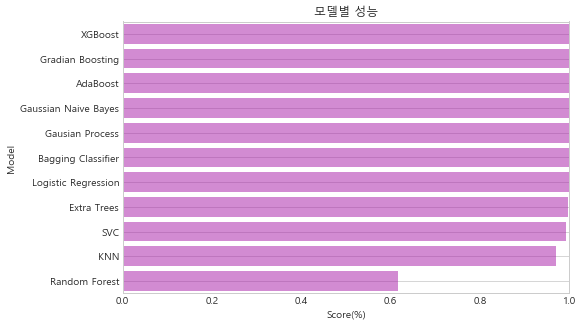

In [67]:
# 성능 시각화.
plt.figure(figsize=(8, 5))
sb.barplot(data=result, x='Score', y='Model', color='m', alpha=.5)
plt.title('모델별 성능')
plt.xlabel('Score(%)')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.grid()
plt.show()

In [68]:
# xgboost 모델의 핵심 컬럼이 무엇인지 확인.
xgb_imp = pd.DataFrame(
    {
        'column' : df.columns,
        'importance' : xgb.feature_importances_
    }
)
xgb_imp

,column,importance
0,Pclass,0.0
1,Sex,0.0
2,Age,0.0
3,Ticket,0.0
4,Fare,0.0
5,Embarked,0.0
6,LastName,0.0
7,Initial,0.0
8,Cabin2,0.0
9,FamilySize,0.0


#### Voting
- 다수의 알고리즘이 던지는 결과를 취합하여 최종 예측.
- Soft voting : 각 알고리즘이 던지는 예측 결과 확률을 취합해서 확률이 높은걸 선택.
- Hard voting : 각 알고리즘이 던지는 예측 결과 값을 취합해서 가장 많이 나온 것을 선택.

In [69]:
# Soft voting.
soft_model = [
        ('model1', ran), ('model2', knn), ('model3', log), ('model4', xgb), 
        ('model5', gbc), ('model6', svc), ('model7', ext), ('model8', ada),
        ('model9', gpc), ('model10', bag)
]
soft_voting = VotingClassifier(estimators=soft_model, voting='soft')

# 10회의 교차검증.
result = cross_val_score(soft_voting, x_train, y_train, cv=10)
result.mean()

[18:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

1.0

In [70]:
# Hard voting.
hard_model = [
        ('model1', ran), ('model2', knn), ('model3', log), ('model4', xgb), 
        ('model5', gbc), ('model6', svc), ('model7', ext), ('model8', ada),
        ('model9', gpc), ('model10', bag)
]
hard_voting = VotingClassifier(estimators=hard_model, voting='hard')

result = cross_val_score(hard_voting, x_train, y_train, cv=10)
result.mean()

[18:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

1.0

#### Deep Learning Modeling

In [71]:
# Seed값 설정.
np.random.seed(3)
tf.random.set_seed(3)

# 모델 설정.
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 저장 조건.
modelpath = 'models/{epoch}-{val_loss}.hdf5'
callback1 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 자동 중단 설정.
callback2 = EarlyStopping(monitor='val_loss', patience=100)

# 모델 실행.
model.fit(x_train, y_train, validation_split=0.2, epochs=100000, batch_size=50, callbacks=[callback1, callback2])

Epoch 1/100000
15/15 [==============================] - 1s 23ms/step - loss: 0.5954 - accuracy: 0.7301 - val_loss: 0.4885 - val_accuracy: 0.8324

Epoch 00001: val_loss improved from inf to 0.48850, saving model to models\1-0.48850053548812866.hdf5
Epoch 2/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.4783 - accuracy: 0.8475 - val_loss: 0.3846 - val_accuracy: 0.8771

Epoch 00002: val_loss improved from 0.48850 to 0.38457, saving model to models\2-0.38456931710243225.hdf5
Epoch 3/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.4064 - accuracy: 0.8803 - val_loss: 0.3187 - val_accuracy: 0.8883

Epoch 00003: val_loss improved from 0.38457 to 0.31873, saving model to models\3-0.3187345266342163.hdf5
Epoch 4/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.3448 - accuracy: 0.9149 - val_loss: 0.2726 - val_accuracy: 0.9274

Epoch 00004: val_loss improved from 0.31873 to 0.27259, saving model to models\4-0.2725938558578491.hdf5
E


Epoch 00033: val_loss improved from 0.04927 to 0.04798, saving model to models\33-0.047976456582546234.hdf5
Epoch 34/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.9975 - val_loss: 0.0469 - val_accuracy: 0.9832

Epoch 00034: val_loss improved from 0.04798 to 0.04687, saving model to models\34-0.046872176229953766.hdf5
Epoch 35/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.9964 - val_loss: 0.0460 - val_accuracy: 0.9832

Epoch 00035: val_loss improved from 0.04687 to 0.04597, saving model to models\35-0.045972034335136414.hdf5
Epoch 36/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0274 - accuracy: 0.9984 - val_loss: 0.0454 - val_accuracy: 0.9832

Epoch 00036: val_loss improved from 0.04597 to 0.04540, saving model to models\36-0.04539726674556732.hdf5
Epoch 37/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.9964 - val_loss: 0.0440 - val_ac

15/15 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 0.9888

Epoch 00066: val_loss improved from 0.03282 to 0.03279, saving model to models\66-0.03279159218072891.hdf5
Epoch 67/100000
15/15 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0325 - val_accuracy: 0.9888

Epoch 00067: val_loss improved from 0.03279 to 0.03249, saving model to models\67-0.03248806670308113.hdf5
Epoch 68/100000
15/15 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9888

Epoch 00068: val_loss improved from 0.03249 to 0.03221, saving model to models\68-0.03220511972904205.hdf5
Epoch 69/100000
15/15 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9888

Epoch 00069: val_loss improved from 0.03221 to 0.03217, saving model to models\69-0.032165560871362686.hdf5
Epo

Epoch 103/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9888

Epoch 00103: val_loss improved from 0.02964 to 0.02961, saving model to models\103-0.029609384015202522.hdf5
Epoch 104/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9888

Epoch 00104: val_loss did not improve from 0.02961
Epoch 105/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9888

Epoch 00105: val_loss did not improve from 0.02961
Epoch 106/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9888

Epoch 00106: val_loss did not improve from 0.02961
Epoch 107/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9888

Epo

15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9888

Epoch 00144: val_loss did not improve from 0.02961
Epoch 145/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9888

Epoch 00145: val_loss did not improve from 0.02961
Epoch 146/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 0.9888

Epoch 00146: val_loss did not improve from 0.02961
Epoch 147/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 0.9888

Epoch 00147: val_loss did not improve from 0.02961
Epoch 148/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 0.9888

Epoch 00148: val_loss did not improve from 0.02961
Epoch 149/100000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9888

Epoch 00185: val_loss did not improve from 0.02961
Epoch 186/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9888

Epoch 00186: val_loss did not improve from 0.02961
Epoch 187/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9888

Epoch 00187: val_loss did not improve from 0.02961
Epoch 188/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9888

Epoch 00188: val_loss did not improve from 0.02961
Epoch 189/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 0.9888

Epoch 00189: val_loss did not improve from 0.02961
Epoch 190/100000
15/15 [===

In [72]:
# 훈련용 데이터를 통한 모델 성능 평가.
# Train data를 통한 평가이므로 매우 당연한 결과.
# Best model 로딩.
best_model = load_model('models/103-0.029609384015202522.hdf5')
best_model.evaluate(x_train, y_train)[1]

28/28 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9978


0.9977553486824036

In [73]:
# 예측 결과.
pred_result = (best_model.predict(X_test) > 0.5).astype('int32')

In [74]:
# 저장.
test['Survived'] = pred_result
test.to_csv('titanic_deep_learning.csv')